<a href="https://colab.research.google.com/github/tristontan/StatSmith/blob/main/SUBGROUP_A_OPTIONAL_QN_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.decomposition as skd
import statsmodels as sm
!pip install plotly==5.15.0
import plotly.express as px

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.5/15.5 MB 14.5 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.24.1
    Uninstalling plotly-5.24.1:
      Successfully uninstalled plotly-5.24.1


In [ ]:
from google.colab import drive
drive.mount('/content/drive')
data = pd.read_csv('../../data/processed/[V2] TRAIN_Survey_data.xlsx')
data.head()

Mounted at /content/drive


,Survey_ID,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Visiting occasion [Free tickets],...,"Purchasing factors [Access to Exclusive Perks (E.g. Fast Pass, VIP Access)]","Purchasing factors [Deals for Tickets (E.g. Multi-Day Ticket Discounts, Family Bundles, Credit Card Offers)]",Purchasing factors [Loyalty Points],Purchasing factors [Clear Pricing Information],"Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]",Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase]
0,1,2,1,2,0,1,0,0,1,0,...,4,4,4,5,5,5,4,2,4,3
1,2,2,2,2,0,1,1,0,1,0,...,4,5,4,5,5,4,5,4,4,2
2,3,2,2,2,0,1,1,1,2,0,...,4,5,4,5,3,3,5,3,3,3
3,4,2,2,2,0,0,1,0,1,0,...,5,5,1,5,5,5,5,2,3,4
4,5,2,1,2,0,1,1,0,1,0,...,5,5,4,5,4,4,5,4,3,3


#EDA

##Univariate Analysis

### Distribution of Satisfaction Score

In [ ]:
satisfaction_counts = data['Rating experience'].value_counts().sort_index()

plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
plt.bar(satisfaction_counts.index, satisfaction_counts.values)
plt.title('Distribution of Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Frequency')
plt.xticks(satisfaction_counts.index)
for i, v in enumerate(satisfaction_counts.values):
    plt.text(satisfaction_counts.index[i], v + 0.5, str(v), ha='center', va='bottom')
plt.show()


###Distribution of Tourist and Local Visitors

In [ ]:
ppl_counts = data['Tourist/Local'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(ppl_counts.index, ppl_counts.values)
plt.title('Distribution of Tourist and Local Visitors')
plt.xlabel('Tourist/Local')
plt.ylabel('Frequency')
new = ['Tourist', 'Local']
plt.xticks(ppl_counts.index, new)
for i, v in enumerate(ppl_counts.values):
    plt.text(ppl_counts.index[i], v + 0.5, str(v), ha='center', va='bottom')
plt.show()


### Distribution of Age Groups

In [ ]:
age_counts = data['Age'].value_counts().sort_index()

plt.figure(figsize=(8, 6))
plt.bar(age_counts.index, age_counts.values)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Frequency')
new = ['19 years old and below',
       '20-29 years old',
       '30-39 years old',
       '40-49 years old',
       '50 years old and above']
plt.xticks(age_counts.index, new, rotation=45, ha='right')
for i, v in enumerate(age_counts.values):
    plt.text(age_counts.index[i], v + 0.5, str(v), ha='center', va='bottom')
plt.show()

###Average satisfaction score grouped by Tourist/Local


In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Tourist/Local', y='Rating experience', data=data, showmeans=False,
            medianprops={'color': 'red', 'linewidth': 2})

plt.title('Satisfaction Score Distribution by Tourist/Local')
plt.xlabel('Tourist/Local')
plt.ylabel('Satisfaction Score')
plt.xticks([0, 1], ['Tourist', 'Local'])
plt.show()

### Average satisfaction scores grouped by age group

In [ ]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Age', y='Rating experience', data=data, showmeans=False,
            medianprops={'color': 'red', 'linewidth': 2})

plt.title('Satisfaction Score Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Satisfaction Score')
plt.xticks([0, 1, 2, 3, 4], ['19 years old and below', '20-29 years old', '30-39 years old', '40-49 years old', '50 years old and above'], rotation=45, ha='right')
plt.show()

## Bivariate Analysis

###Correlation Matrix between Experience Ratings and Willingness to Pay (erm might need to relook at this again)

In [ ]:

# List of relevant columns
correlation_columns = [
    'Likelihood of return [General]',
    "USS experience rating [Crowdedness]",
    "USS experience rating [Variety of Rides and Attractions]",
    "USS experience rating [Special Events and Performances (E.g. Halloween Horror Night)]",
    'Max tolerable ticket price [Peak]', 'Max tolerable ticket price [Non-peak]'
]

# Select only the relevant columns from your DataFrame
df_selected = data[correlation_columns]

# Calculate Spearman correlation
correlation_matrix = df_selected.corr(method='spearman')

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix between Experience Ratings and Willingness to Pay")
plt.xticks(rotation=45, ha='right')
plt.show()


###Conditional Probability of Willingness to Pay by Variety of Rides and Attractions Rating

In [ ]:
heatmap_data = pd.crosstab(data["USS experience rating [Variety of Rides and Attractions]"],
                           data['Max tolerable ticket price [Peak]'], normalize="index")

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, cmap="Blues", fmt=".2f")
plt.title("Conditional Probability of Willingness to Pay by Variety of Rides and Attractions Rating")
plt.xlabel("Peak Ticket Price Range")
plt.ylabel("Variety of Rides and Attractions Rating")
plt.show()

###Satisfaction Score vs. Likelihood of Return, by Age Group

In [ ]:
data['Satisfaction_Group'] = pd.cut(data['Rating experience'], bins=5, labels=['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied'])
data['Return_Group'] = pd.cut(data['Likelihood of return [General]'], bins=5, labels=['Very Unlikely', 'Unlikely', 'Neutral', 'Likely', 'Very Likely'])

age_groups = sorted(data['Age'].unique())
num_age_groups = len(age_groups)

# Calculate grid dimensions
num_cols = 3  # You can adjust this
num_rows = int(np.ceil(num_age_groups / num_cols))

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))  # Adjust figsize as needed

age_group_labels = {
    1: '19 years old and below',
    2: '20-29 years old',
    3: '30-39 years old',
    4: '40-49 years old',
    5: '50-59 years old',
    6: '60 years old and above'
}

# Iterate through age groups and create heatmaps
for i, age_group in enumerate(age_groups):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]  # Get the current subplot

    heatmap_data = pd.crosstab(data[data['Age'] == age_group]['Satisfaction_Group'],
                               data[data['Age'] == age_group]['Return_Group'])

    sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d', ax=ax)
    ax.set_title(f'Satisfaction Score vs. Likelihood of Return ({age_group_labels.get(age_group, age_group)})', fontsize=10)
    ax.set_xlabel('Likelihood of Return')
    ax.set_ylabel('Satisfaction Score')

overall_heatmap_data = pd.crosstab(data['Satisfaction_Group'], data['Return_Group'])

# Plot overall heatmap in the empty subplot
if num_age_groups < num_rows * num_cols:
    row = num_rows - 1
    col = num_cols - 1
    ax = axes[row, col]

    sns.heatmap(overall_heatmap_data, annot=True, cmap='Blues', fmt='d', ax=ax, annot_kws={"size": 6})
    ax.set_title('Overall Satisfaction Score vs. Likelihood of Return', fontsize=10)
    ax.set_xlabel('Likelihood of Return', fontsize=8)
    ax.set_ylabel('Satisfaction Score', fontsize=8)

# Adjust layout
plt.tight_layout()
plt.show()


###Satisfaction Score vs. Likelihood of Return, by Tourist/Local (i cant add the titles)

In [ ]:
data['Satisfaction_Group'] = pd.cut(data['Rating experience'], bins=5, labels=['Very Dissatisfied', 'Dissatisfied', 'Neutral', 'Satisfied', 'Very Satisfied'])
data['Return_Group'] = pd.cut(data['Likelihood of return [General]'], bins=5, labels=['Very Unlikely', 'Unlikely', 'Neutral', 'Likely', 'Very Likely'])


for group in data['Tourist/Local'].unique():
    heatmap_data = pd.crosstab(data[data['Tourist/Local'] == group]['Satisfaction_Group'],
                               data[data['Tourist/Local'] == group]['Return_Group'])

    fig, ax = plt.subplots(figsize=(10, 8))  # Create a figure and an axes object
    sns.heatmap(heatmap_data, annot=True, cmap='Blues', fmt='d', ax=ax)

    # Set the title on the figure, which sometimes works better in certain environments
    if group == 'Tourist':
        fig.suptitle('Satisfaction Score vs. Likelihood of Return (Tourists)', fontsize=16)
    elif group == 'Local':
        fig.suptitle('Satisfaction Score vs. Likelihood of Return (Locals)', fontsize=16)

    ax.set_xlabel('Likelihood of Return')
    ax.set_ylabel('Satisfaction Score')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to make room for the suptitle
    plt.show()


###Key Factors Affecting Satisfaction (actually is there a better way to do this)


In [ ]:
#it produces a symmetric matrix
key_factors = ['Improve experience [Short wait times]',
               'Improve experience [Lack of crowds]',
               'Improve experience [Fun attractions]',
               'Improve experience [Affordable food options]',
               'Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]',
               'Improve experience [Cooling Weather]',
               'Improve experience [Presence of Shaded Rest Areas]',
               'Improve experience [Usability of the Universal Studios Singapore App]']

new = {
    'Improve experience [Short wait times]': 'Short wait times',
    'Improve experience [Lack of crowds]': 'Lack of crowds',
    'Improve experience [Fun attractions]': 'Fun attractions',
    'Improve experience [Affordable food options]': 'Affordable food options',
    'Improve experience [Accessibility (Ramps, even ground, easy to find seats etc)]': 'Accessibility',
    'Improve experience [Cooling Weather]': 'Cooling Weather',
    'Improve experience [Presence of Shaded Rest Areas]': 'Presence of Shaded Rest Areas',
    'Improve experience [Usability of the Universal Studios Singapore App]': 'Usability of the Universal Studios Singapore App'
}

# Create a subset of the data with key factors and satisfaction
heatmap_data = data[key_factors]

# Calculate correlation matrix
correlation_matrix = heatmap_data.corr()
correlation_matrix = correlation_matrix.rename(columns=new, index=new)

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Greens', fmt=".2f")
plt.title('Key Factors Affecting Overall Satisfaction Scores')
plt.show()

#Dynamic Pricing

###ML pricing

In [ ]:
#I THINK CAN IGNORE THIS
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error



# Feature and target selection
features = data[['Age', 'Gender', 'Tourist/Local', 'USS companion [Friends]', 'Attractive factors [Food options]',
                 'Max tolerable ticket price [Peak]', 'Rating experience', 'Likelihood of recommendation']]
target = data['Max tolerable ticket price [Peak]']  # Use this or another relevant target

# Encode categorical features
features = pd.get_dummies(features, drop_first=True)  # drop_first avoids multicollinearity

# Split the data
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Initialize and train the model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions and evaluation
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Apply model to create dynamic pricing column
data['Dynamic Price ML'] = model.predict(features)

# Display dynamic pricing predictions
print(data[['Dynamic Price ML']].head())


Mean Squared Error: 0.0
   Dynamic Price ML
0               4.0
1               4.0
2               4.0
3               3.0
4               5.0


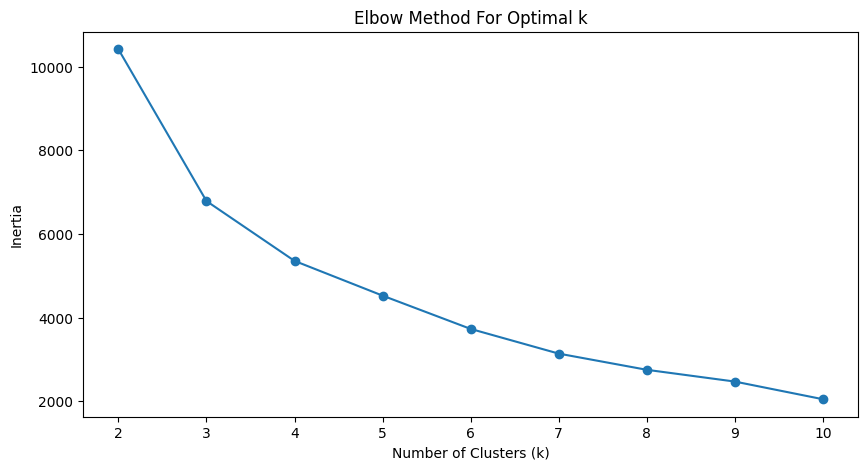

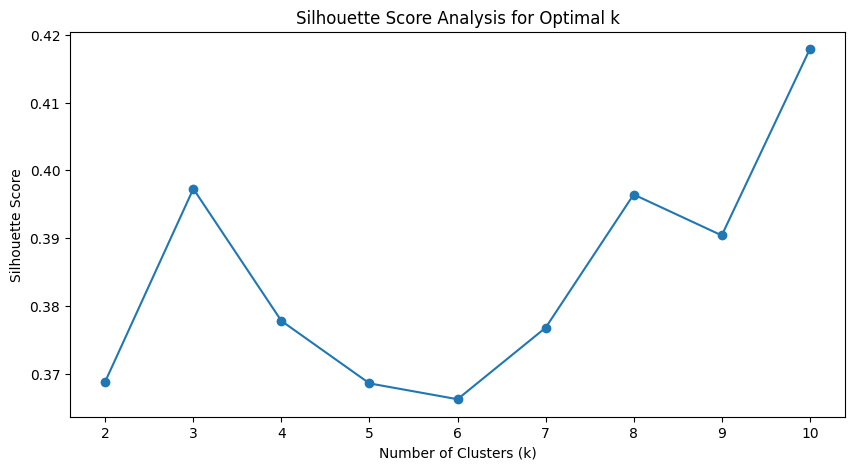

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data[['Age', 'Rating experience', 'Likelihood of recommendation', 'USS experience rating [Waiting Time]']])  # Modify features as needed

# Dimensionality Reduction with PCA
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)

# Elbow Method to Determine Optimal K
inertia = []
sil_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_features)
    inertia.append(kmeans.inertia_)
    sil_scores.append(silhouette_score(pca_features, kmeans.labels_))

# Plot Elbow Method
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

# Plot Silhouette Scores
plt.figure(figsize=(10, 5))
plt.plot(range(2, 11), sil_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score Analysis for Optimal k')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

# Find the optimal number of clusters using silhouette score
silhouette_scores = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f'Number of clusters: {k}, Silhouette Score: {silhouette_avg}')


Number of clusters: 2, Silhouette Score: 0.33573607724958593
Number of clusters: 3, Silhouette Score: 0.3368671615707701
Number of clusters: 4, Silhouette Score: 0.30268188302284993
Number of clusters: 5, Silhouette Score: 0.2812161128838895
Number of clusters: 6, Silhouette Score: 0.2935775796331926
Number of clusters: 7, Silhouette Score: 0.3073256773995002
Number of clusters: 8, Silhouette Score: 0.29796836504061436
Number of clusters: 9, Silhouette Score: 0.31696566339862914


   Cluster
0        1
1        2
2        1
3        2
4        1


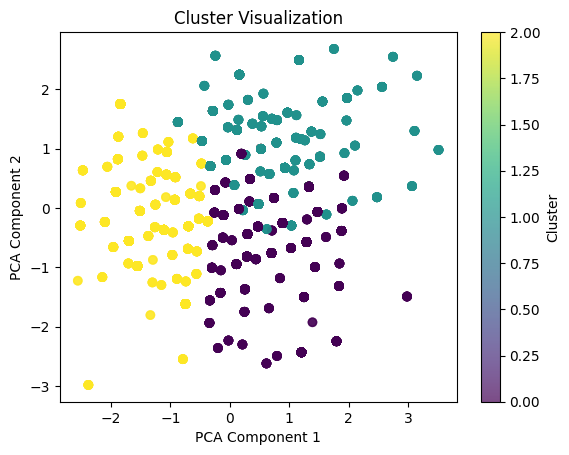

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Select features (example subset; adjust based on your dataset)
features = data[['Age', 'Rating experience', 'Likelihood of recommendation', 'USS experience rating [Waiting Time]']]  # Add more as needed

# Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Fit KMeans
kmeans = KMeans(n_clusters=3, random_state=42)  # Adjust n_clusters based on your needs
data['Cluster'] = kmeans.fit_predict(scaled_features)

# View clusters assigned to each data point
print(data[['Cluster']].head())

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Dimensionality reduction for visualization
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

# Plot clusters
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=data['Cluster'], cmap='viridis', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Cluster Visualization')
plt.colorbar(label='Cluster')
plt.show()


In [ ]:
# Calculate the mean of the features for each cluster
cluster_summary = data.groupby('Cluster').mean()

# Display the average features for each cluster
cluster_summary


,Survey_ID,Age,Gender,Tourist/Local,USS companion [Children],USS companion [Family],USS companion [Friends],USS companion [Significant other],Visiting frequency,Visiting occasion [Free tickets],...,Purchasing factors [Clear Pricing Information],"Purchasing factors [Multiple Payment Options (E.g. Credit Card, PayPal)]",Purchasing factors [Clear Refund and Exchange Policies],Purchasing factors [Fast Checkout Process],Purchasing factors [Personalised Recommendations based on Visitor Preferences],Purchasing factors [Live Chat/Support for Booking Assistance],Purchasing factors [Option to Add-On Parking Passes during Purchase],Dynamic Price ML,Predicted Peak Price,Predicted Non-Peak Price
Cluster,,,,,,,,,,,,,,,,,,,,,
0,3959.170376,1.496523,1.430111,1.492350,0.031641,0.330320,0.443672,0.059110,1.172809,0.002782,...,4.113700,3.906120,3.949583,3.981572,3.279207,3.401252,3.052156,3.872045,3.865769,2.976835
1,2923.025532,3.282447,1.591489,1.855319,0.090426,0.483511,0.475532,0.196809,1.238298,0.005319,...,4.278191,3.643085,3.914362,4.163298,3.298404,3.183511,3.229255,3.546277,3.564736,2.849123
2,3753.456487,3.518936,1.474617,1.640612,0.135375,0.195407,0.226430,0.190572,1.101531,0.003223,...,3.661563,3.090653,3.537873,3.562450,2.990733,2.866640,2.675665,3.161966,3.166482,1.874376


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import pandas as pd
# Define the features and target columns for peak and non-peak pricing
features = data[['Age', 'Rating experience', 'Likelihood of recommendation',
                 'USS experience rating [Waiting Time]', 'Cluster']]
target_peak = data['Max tolerable ticket price [Peak]']
target_non_peak = data['Max tolerable ticket price [Non-peak]']

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Split data into training and testing sets
X_train_peak, X_test_peak, y_train_peak, y_test_peak = train_test_split(scaled_features, target_peak, test_size=0.2, random_state=42)
X_train_non_peak, X_test_non_peak, y_train_non_peak, y_test_non_peak = train_test_split(scaled_features, target_non_peak, test_size=0.2, random_state=42)

# Train two separate models for peak and non-peak pricing
pricing_model_peak = RandomForestRegressor(random_state=42)
pricing_model_peak.fit(X_train_peak, y_train_peak)

pricing_model_non_peak = RandomForestRegressor(random_state=42)
pricing_model_non_peak.fit(X_train_non_peak, y_train_non_peak)

# Predict and evaluate for peak pricing
peak_predictions = pricing_model_peak.predict(X_test_peak)
mse_peak = mean_squared_error(y_test_peak, peak_predictions)
print(f"Mean Squared Error for Peak Pricing Model: {mse_peak}")

# Predict and evaluate for non-peak pricing
non_peak_predictions = pricing_model_non_peak.predict(X_test_non_peak)
mse_non_peak = mean_squared_error(y_test_non_peak, non_peak_predictions)
print(f"Mean Squared Error for Non-Peak Pricing Model: {mse_non_peak}")

# Add predicted prices for dynamic pricing to the data
data['Predicted Peak Price'] = pricing_model_peak.predict(scaled_features)
data['Predicted Non-Peak Price'] = pricing_model_non_peak.predict(scaled_features)

print(data[['Cluster', 'Predicted Peak Price', 'Predicted Non-Peak Price']])


Mean Squared Error for Peak Pricing Model: 0.9749613968438889
Mean Squared Error for Non-Peak Pricing Model: 1.0137992804211655
      Cluster  Predicted Peak Price  Predicted Non-Peak Price
0           1              3.978075                  3.223019
1           2              4.183850                  2.541477
2           1              3.978075                  3.223019
3           2              2.983688                  1.997034
4           1              3.978075                  3.223019
...       ...                   ...                       ...
7233        0              4.555548                  4.063086
7234        0              4.209396                  2.866126
7235        0              3.747611                  2.900195
7236        0              4.840149                  3.000000
7237        2              3.050292                  1.819327

[7238 rows x 3 columns]


## rule-based pricing

In [ ]:
def dynamic_pricing(row):
    base_price = 70  # Base ticket price
    price = base_price

    if row['Time enter'] == 1:
        price *= 1.2  # 20% increase for morning entry)
    elif row['Time enter'] == 2:
        price *= 1.1  # 10% increase for entry 60 mins after park opens
    elif row['Time enter'] == 3:
        price *= 1.05  # 5% increase for afternoon entry
    elif row['Time enter'] == 4:
        # No increase for evening entry

    # Offer discount to locals
      if row['Tourist/Local'] == 'Local':
        price *= 0.9  # 10% discount for locals

    # Apply satisfaction-based discount
      if row['Rating experience'] < 3:
        price *= 0.8  # Additional 20% discount for low satisfaction scores

    price = round(price, 2)
    return price

# function
data['Dynamic Price'] = data.apply(dynamic_pricing, axis=1)
print(data[['Tourist/Local', 'Time enter', 'Rating experience', 'Dynamic Price']].head())




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np


data['Segment'] = pd.qcut(data['Max tolerable ticket price [Peak]'], q=3, labels=['Low', 'Medium', 'High'])

plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Segment', y='Max tolerable ticket price [Peak]', palette='Set2')
plt.title('Max Tolerable Ticket Price by Segment')
plt.xlabel('Visitor Segment')
plt.ylabel('Max Tolerable Ticket Price')
plt.show()

# Interactive simulation of dynamic pricing : supposed to be a scatter plot

fig = px.scatter(
    data,
    x='Visiting frequency',
    y='Max tolerable ticket price [Peak]',
    color='Segment',
    size='Likelihood of return [General]',
    hover_data=['Age', 'Gender', 'Visiting occasion [Public holiday]'],
    title='Dynamic Pricing Simulation: Max Ticket Price vs Visiting Frequency'
)

fig.show()

# Simulate dynamic pricing with user input for discount factor

def dynamic_pricing_simulation(discount_factor):
    data['Dynamic Price'] = data['Max tolerable ticket price [Peak]'] * (1 - discount_factor)
    fig_sim = px.histogram(
        data, x='Dynamic Price', color='Segment', nbins=30, title=f'Dynamic Price Distribution (Discount: {discount_factor*100:.0f}%)'
    )
    fig_sim.show()

# running one example with 20% disc
dynamic_pricing_simulation(0.20)

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scaling 'Rating experience'
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))  # Scaling 'Max tolerable ticket price [Peak]'

df = pd.DataFrame(data)

X = df[['Rating experience']]
y = df['Max tolerable ticket price [Peak]']

model = LinearRegression()
model.fit(X, y)

# predict pricing based on customer experience rating
df['Predicted Price'] = model.predict(X)

# actual vs predicted pricing
plt.scatter(df['Rating experience'], df['Max tolerable ticket price [Peak]'], color='blue', label='Actual Price')
plt.plot(df['Rating experience'], df['Predicted Price'], color='red', label='Predicted Price')
plt.title('Dynamic Pricing Decision Model')
plt.xlabel('Experience Rating')
plt.ylabel('Max Tolerable Ticket Price')
plt.legend()
plt.show()

# trying poly regression instead
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

poly_model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model.fit(X, y)

plt.scatter(df['Rating experience'], y, color='blue', label='Actual Price')
plt.plot(df['Rating experience'], poly_model.predict(X), color='red', label='Predicted Price (Polynomial)')
plt.title('Polynomial Regression')
plt.xlabel('Experience Rating')
plt.ylabel('Max Tolerable Ticket Price')
plt.legend()
plt.show()

## trying random forest
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
import matplotlib.pyplot as plt

X = df[['Rating experience', 'USS experience rating [Variety of Rides and Attractions]', 'USS experience rating [Crowdedness]', 'USS experience rating [Value for Money (Entrance Fee, Food, etc)]']]
y = df['Max tolerable ticket price [Peak]']
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X, y)

y_pred = rf_model.predict(X)
plt.scatter(X['Rating experience'], y, color='blue', label='Actual Price')
plt.scatter(X['Rating experience'], y_pred, color='red', label='Predicted Price')
plt.title('Dynamic Pricing with Random Forest')
plt.xlabel('Experience Rating')
plt.ylabel('Max Tolerable Ticket Price')
plt.legend()
plt.show()

print("R² Score:", r2_score(y, y_pred))
print("Mean Absolute Error:", mean_absolute_error(y, y_pred))

####trying to prevent overfitting


# Combine additional features to improve predictions (will try this later but i need to change the column headers)
X = df[['Rating experience', 'USS experience rating [Variety of Rides and Attractions]', 'USS experience rating [Crowdedness]', 'USS experience rating [Value for Money (Entrance Fee, Food, etc)]']]
y = df['Max tolerable ticket price [Peak]']

model.fit(X, y)
plt.scatter(X['Rating experience'], y, color='blue', label='Actual Price')
plt.plot(X['Rating experience'], model.predict(X), color='red', label='Predicted Price')
plt.title('Dynamic Pricing Model with More Features')
plt.xlabel('Experience Rating')
plt.ylabel('Max Tolerable Ticket Price')
plt.legend()
plt.show()



In [ ]:
##cross validation for random forest

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

rf = RandomForestRegressor(n_estimators=100, random_state=42)
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')

cv_rmse_scores = np.sqrt(-cv_scores)
print("Cross-Validation RMSE scores:", cv_rmse_scores)
print("Mean RMSE:", np.mean(cv_rmse_scores))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
import matplotlib.pyplot as plt

plt.scatter(X_test['Rating experience'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['Rating experience'], y_pred, color='red', label='Predicted Price')
plt.title('Dynamic Pricing with Random Forest (Test Set)')
plt.xlabel('Experience Rating')
plt.ylabel('Max Tolerable Ticket Price')
plt.legend()
plt.show()

### no usable results.....

##try another method
import matplotlib.pyplot as plt
import numpy as np

experience_ratings = np.linspace(2, 5, 50)

# Create a DataFrame with the same column names as the training data
prediction_df = pd.DataFrame({'Rating experience': experience_ratings})

# Assuming other features are not relevant for this prediction, fill with 0 or mean values
# Replace with appropriate values if you have them:
prediction_df['USS experience rating [Variety of Rides and Attractions]'] = 0  # Example: Filling with 0
prediction_df['USS experience rating [Crowdedness]'] = 0  # Example: Filling with 0
prediction_df['USS experience rating [Value for Money (Entrance Fee, Food, etc)]'] = 0  # Example: Filling with 0


# Simulate demand curve (e.g., less demand for higher prices)
predicted_prices = rf.predict(prediction_df)
demand = 5 - predicted_prices  # Assuming customers tolerate prices close to their experience level
demand = np.clip(demand, a_min=0.1, a_max=None)  # Avoid division by zero


revenue = predicted_prices * demand

plt.plot(experience_ratings, revenue, label='Expected Revenue', color='green')
plt.scatter(X_test['Rating experience'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['Rating experience'], y_pred, color='red', label='Predicted Price')
plt.title('Dynamic Pricing: Predicted Prices and Revenue Simulation')
plt.xlabel('Experience Rating')
plt.ylabel('Revenue')
plt.legend()
plt.show()





In [ ]:
from xgboost import XGBRegressor

X_train.columns = X_train.columns.str.replace(r"[\[\]<>,]", "", regex=True)
X_test.columns = X_test.columns.str.replace(r"[\[\]<>,]", "", regex=True)
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

plt.scatter(X_test['Rating experience'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['Rating experience'], y_pred_xgb, color='orange', label='XGBoost Predicted Price')
plt.title('Dynamic Pricing with XGBoost')
plt.xlabel('Experience Rating')
plt.ylabel('Max Tolerable Ticket Price')
plt.legend()
plt.show()


In [ ]:
from sklearn.linear_model import BayesianRidge

bayesian_ridge = BayesianRidge()
bayesian_ridge.fit(X_train, y_train)
y_pred_bayes = bayesian_ridge.predict(X_test)

plt.scatter(X_test['Rating experience'], y_test, color='blue', label='Actual Price')
plt.scatter(X_test['Rating experience'], y_pred_bayes, color='green', label='Bayesian Predicted Price')
plt.title('Dynamic Pricing with Bayesian Ridge Regression')
plt.xlabel('Experience Rating')
plt.ylabel('Max Tolerable Ticket Price')
plt.legend()
plt.show()
